In [50]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy.optimize import minimize, rosen, rosen_der
from scipy import interpolate
import scipy
import os 
from scipy.optimize import curve_fit
from scipy.integrate import simps
import pandas as pd

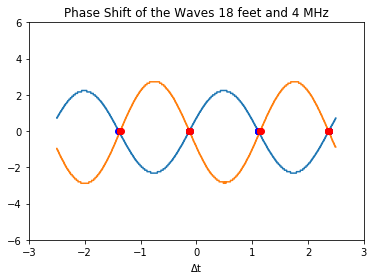

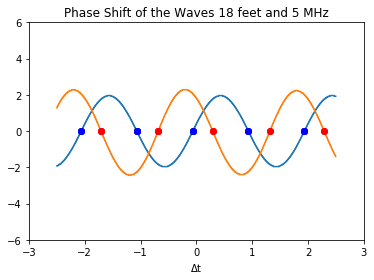

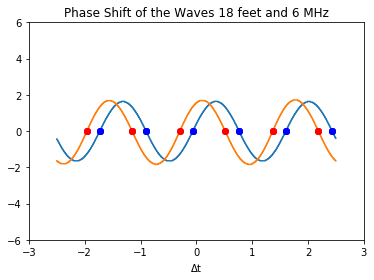

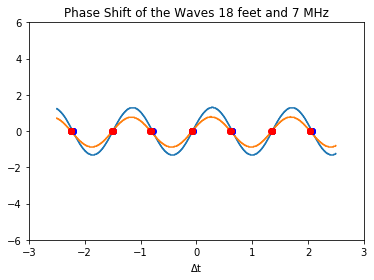

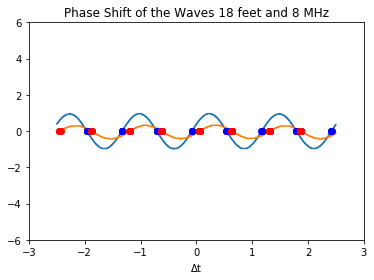

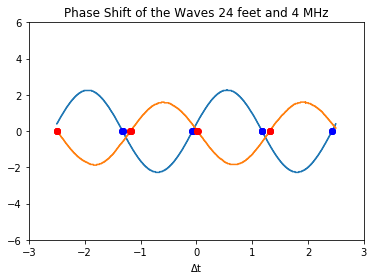

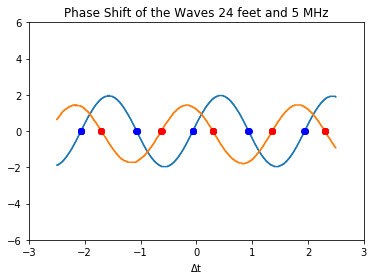

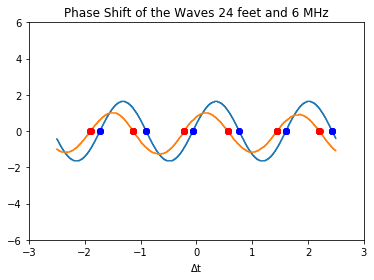

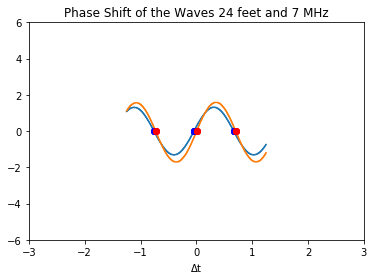

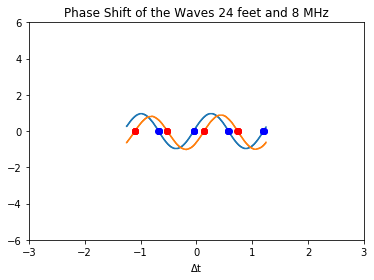

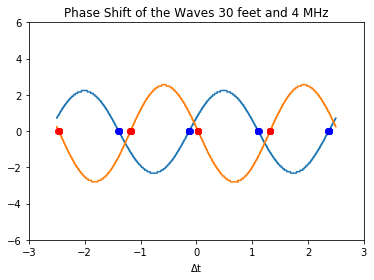

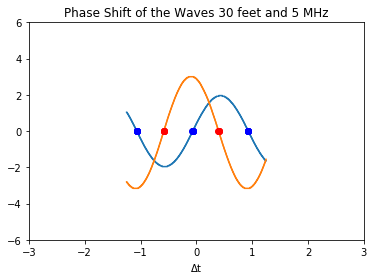

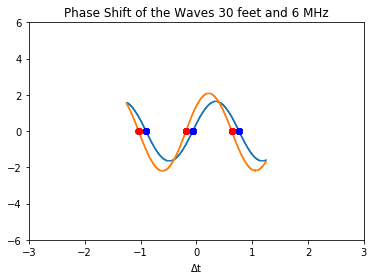

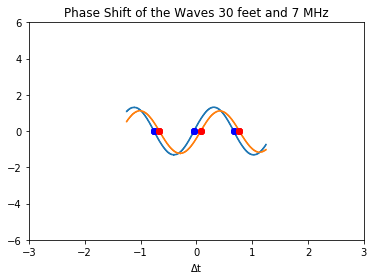

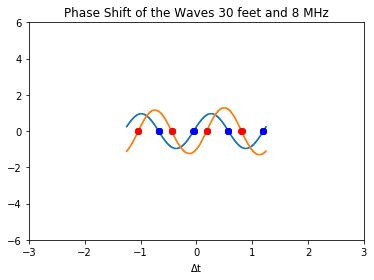

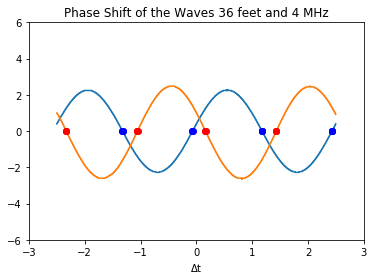

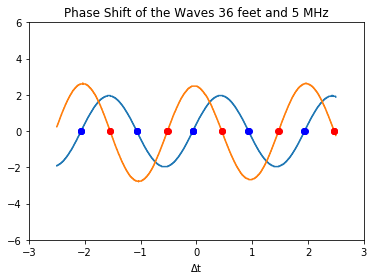

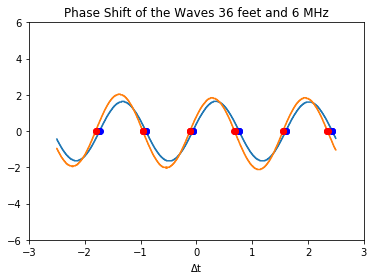

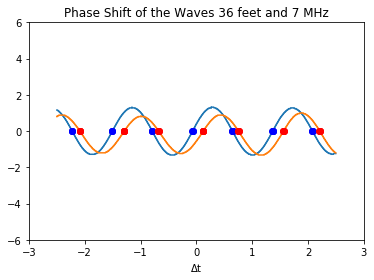

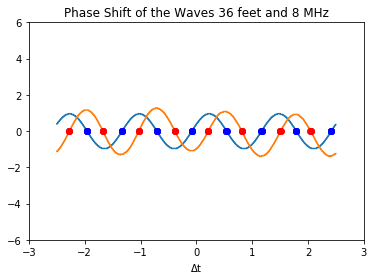

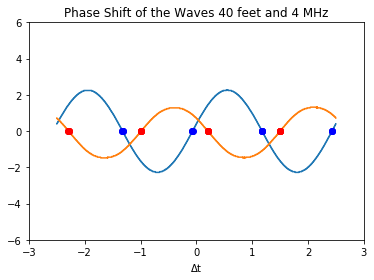

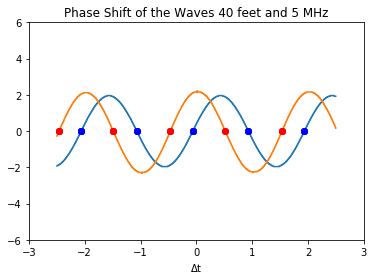

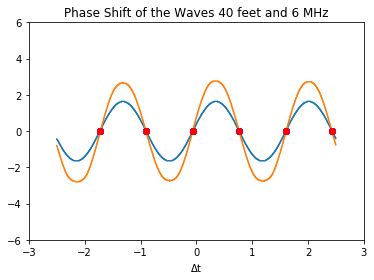

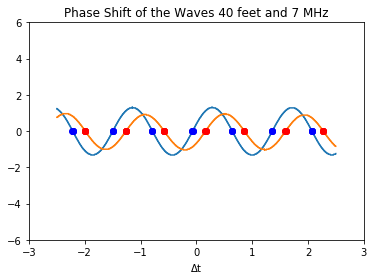

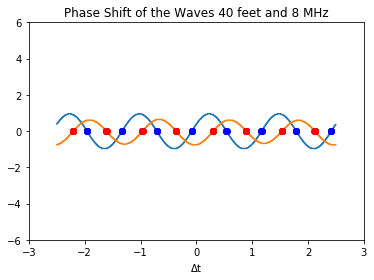

In [266]:
time_differences_all = [] 
#Nested loop so that you can do process for each distance
#and each frequency
#So you have a list of lists, where each list inside the bigger list
#is the time shift for each frequency at a distance
#later we take the average of each of these
#so you get the average time shift for a distance
#which gives you the five values we plot at the end
for x in [18,24,30,36,40]:
    x = str(x)
    time_difs = [] 
    for y in [4,5,6,7,8]: 
        y = str(y)
        curve1 = pd.read_csv("C:/Users/19133/Documents/New_Light/" + x + "/" + y + "/ALL0000/F0000CH1.csv",header=None)
        curve2 = pd.read_csv("C:/Users/19133/Documents/New_Light/" + x + "/" + y + "/ALL0000/F0000CH2.csv",header=None)
        
        #making them on the same scale from the data 
        curve2_scale = float(curve2[1][8])/float(curve1[1][8])
        
        #I just multiplied by 10**7 to get better intuition about the plots
        #I undo it later by multiplying by 10**-7
        plt.plot(curve1[3]*(10**7), curve1[4])
        plt.plot(curve2[3]*(10**7), curve2[4]/curve2_scale)

        plt.ylim(-6,6)
        plt.xlim(-3,3)
        
        g = np.where(curve1[4] == 0)
        f = np.where(curve2[4] == 0)

        plt.plot(curve1[3][g[0]]*(10**7),curve1[3][g[0]]*0,'bo')
        plt.plot(curve2[3][f[0]]*(10**7),curve2[3][f[0]]*0,'ro')

        plt.xlabel('$\Delta$t')
        plt.title('Phase Shift of the Waves ' + x + ' feet and ' + y + ' MHz')
        plt.savefig('fig')
        plt.show()

        #time_differences_single = [] 

        for n in [0]:
            shift = np.abs(curve2[3][f[0][n]]*(10**7) - curve1[3][g[0][n]]*(10**7))
            time_difs = np.append(time_difs,shift)
    time_differences_all.append(time_difs)

In [268]:
print('So you can see for each distance, the different frequencies give like WAY different time shifts??')

So you can see for each distance, the different frequencies give like WAY different time shifts??


In [269]:
#Doing what i talked about at the beginning
time_differences_averages = [] 
for x in time_differences_all: 
    mean = np.mean(x)*(10**(-7))
    time_differences_averages.append(mean)

this should be linear wtf???? is going on????


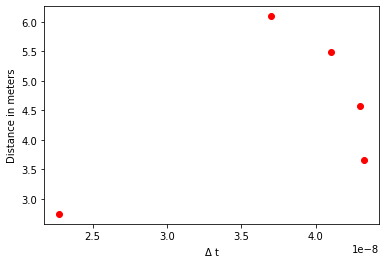

In [270]:
dist_m = np.array([18/3.281,24/3.281,30/3.281,36/3.281,40/3.281])
plt.plot(time_differences_averages,dist_m/2,'ro')
plt.xlabel('$\Delta$ t')
plt.ylabel('Distance in meters')
